In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud, STOPWORDS
import json
import os
from pprint import pprint

In [2]:
df = pd.read_csv("data/Byeonghap_final5.csv", index_col=0)

In [3]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6명,0
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27명,0
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0명,0
3,마다가스카르 사진전,사진,2322000,38,6110500,54명,0
4,인형의 시간들,출판,727000,36,2019400,29명,0
...,...,...,...,...,...,...,...
9590,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트
9591,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈
9592,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>"
9593,함께 행복하개! 유기견 팔찌,캐릭터 · 굿즈,865000,173,5000,45,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.


In [4]:
# 인덱스 순서대로 다시 설정

index = [i for i in range(len(df))]
index

df["index"] = index

In [5]:
df = df.set_index("index")
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description
index,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6명,0
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27명,0
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0명,0
3,마다가스카르 사진전,사진,2322000,38,6110500,54명,0
4,인형의 시간들,출판,727000,36,2019400,29명,0
...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>"


In [6]:
# 결과 컬럼 추가 : 성사 - 1 , 실패 - 0

df["result"] = 3   # 아무값이나 해서 컬럼 생성

for i in range(len(df["percentage"])):
    if df["percentage"][i] >= 100:
        df["result"][i] = 1
    else: 
        df["result"][i] = 0

In [7]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result
index,,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6명,0,0
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27명,0,0
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0명,0,0
3,마다가스카르 사진전,사진,2322000,38,6110500,54명,0,0
4,인형의 시간들,출판,727000,36,2019400,29명,0,0
...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1


<AxesSubplot:>

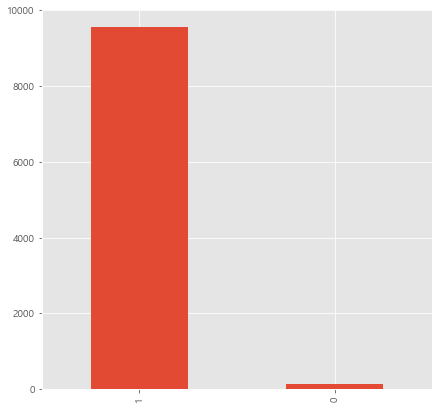

In [8]:
df["result"].value_counts().plot(kind = "bar") #성공실패 갯수 차이 그래프로 확인

In [9]:
print(df.groupby('result').size().reset_index(name = 'count')) # 성공실패 갯수 숫자로 확인

   result  count
0       0    149
1       1   9561


In [10]:
print(df.isnull().sum()) #결측치 확인

title                     0
category                  0
current_funding_amount    0
percentage                0
target_funding_amount     0
supporter                 0
description               0
result                    0
dtype: int64


In [11]:
import re

In [12]:
df["title"] = df["title"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","") # title에서 띄어쓰기, 특수문자, 영어 제외(한글만 선택)
df[:5]

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result
index,,,,,,,,
0,짐볼로만든인형돌리볼리,캐릭터 · 굿즈,329000,8,4112500,6명,0,0
1,함께만드는악기전문웹진,출판,701000,14,5007100,27명,0,0
2,감사한분들께드리는마음을담을고급가죽봉투,디자인 문구,0,0,0,0명,0,0
3,마다가스카르사진전,사진,2322000,38,6110500,54명,0,0
4,인형의시간들,출판,727000,36,2019400,29명,0,0


In [13]:
df1 = df[["title","result"]] # 필요한 부분만 남김
df1

,title,result
index,,
0,짐볼로만든인형돌리볼리,0
1,함께만드는악기전문웹진,0
2,감사한분들께드리는마음을담을고급가죽봉투,0
3,마다가스카르사진전,0
4,인형의시간들,0
...,...,...
9705,메카피아의한국전통자개문양피젯스피너,1
9706,카프카변신초판본과독서카드,1
9707,낯선첫발을내딛는이방인을위한연남동작은방,1


In [14]:
df1['title'] = df1['title'].str.replace('^ +', "") # white space 데이터를 empty value로 변경, 한글이 없는 경우 공란이 됨
df1['title'].replace('', np.nan, inplace=True)
print(df1.isnull().sum())

title     56
result     0
dtype: int64


In [15]:
df1.loc[df1.title.isnull()][:5]

,title,result
index,,
77,NaN,0
325,NaN,1
668,NaN,1
1411,NaN,1
1881,NaN,1


In [16]:
df1 = df1.dropna(how = 'any') #Nan title 제거

In [17]:
df1

,title,result
index,,
0,짐볼로만든인형돌리볼리,0
1,함께만드는악기전문웹진,0
2,감사한분들께드리는마음을담을고급가죽봉투,0
3,마다가스카르사진전,0
4,인형의시간들,0
...,...,...
9705,메카피아의한국전통자개문양피젯스피너,1
9706,카프카변신초판본과독서카드,1
9707,낯선첫발을내딛는이방인을위한연남동작은방,1


<AxesSubplot:>

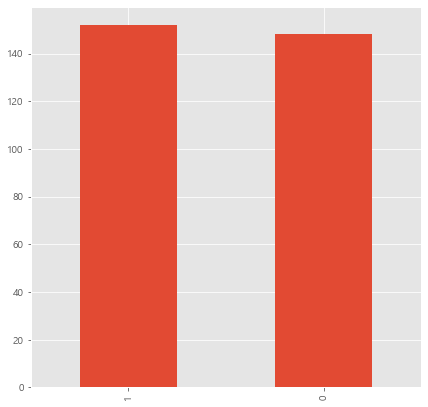

In [37]:
df2["result"].value_counts().plot(kind = "bar")

In [18]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] #불용어 처리

In [19]:
from tqdm import tqdm
import time

okt = Okt()

X_train = [] # 성공실패 차이가 많이 나서 train, test로 나눌 수 없었음. 일괄적으로 train에 넣고 진행함.
for sentence in tqdm(df1['title']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████████████████████████████████████████████████████████████████████████| 9654/9654 [01:53<00:00, 85.08it/s]


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [21]:
print(tokenizer.word_index) # 토큰의 정수화

{'을': 1, '위': 2, '웹툰': 3, '스케치업': 4, '하': 5, '배경': 6, '담다': 7, '당신': 8, '뱃지': 9, '로': 10, '백': 11, '프로젝트': 12, '이야기': 13, '세트': 14, '나': 15, '우리': 16, '집': 17, '내': 18, '즈': 19, '인': 20, '에게': 21, '에서': 22, '고양이': 23, '만들다': 24, '되다': 25, '함께': 26, '판타지': 27, '달력': 28, '선물': 29, '그': 30, '북': 31, '여행': 32, '향기': 33, '보다': 34, '제': 35, '년': 36, '책': 37, '일상': 38, '없다': 39, '다': 40, '일러스트': 41, '지': 42, '세상': 43, '꽃': 44, '굿': 45, '일': 46, '제작': 47, '향수': 48, '브러쉬': 49, '마음': 50, '성': 51, '사랑': 52, '대': 53, '않다': 54, '속': 55, '한국': 56, '여성': 57, '첫': 58, '커피': 59, '여': 60, '적': 61, '앵콜': 62, '종': 63, '시': 64, '있다': 65, '들다': 66, '서': 67, '겨울': 68, '따뜻하다': 69, '너': 70, '이다': 71, '티': 72, '키트': 73, '시간': 74, '봄': 75, '세': 76, '사람': 77, '양': 78, '작다': 79, '달콤하다': 80, '아': 81, '개': 82, '전': 83, '기록': 84, '만': 85, '감성': 86, '디자인': 87, '만나다': 88, '엽서': 89, '장': 90, '고': 91, '가방': 92, '카드': 93, '여름': 94, '시리즈': 95, '든': 96, '기억': 97, '파우치': 98, '다이어리': 99, '매다': 100, '문': 101, '기': 102, '더': 10

In [22]:
vocab_size = len(tokenizer.word_index)
print("단어 집합의 크기 :", vocab_size)

단어 집합의 크기 : 12081


In [23]:
y_train = np.array(df1['result']) #성공, 실패를 y_train에 넣음

In [24]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

In [25]:
print(X_train[:3])

[[5933, 404, 96, 159, 5934, 34], [26, 24, 2130, 83, 101, 5935], [2538, 279, 488, 300, 50, 1, 720, 1, 604, 208, 1606]]


제목의 최대 길이 : 15
제목의 평균 길이 : 7.302568883364408


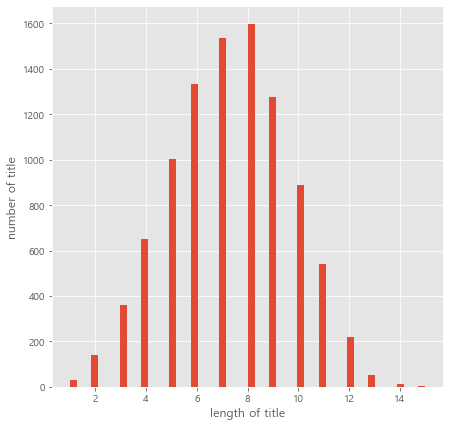

In [26]:
print('제목의 최대 길이 :',max(len(review) for review in X_train))
print('제목의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of title')
plt.ylabel('number of title')
plt.show()

In [27]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [28]:
max_len = 15 # 단어 최대치로 설정
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 15 이하인 샘플의 비율: 100.0


In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=max_len) # 최대치에 맞춰서 패딩함

In [30]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
121/121 [==============================] - ETA: 0s - loss: 0.1117 - acc: 0.9776
Epoch 00001: val_acc improved from -inf to 1.00000, saving model to best_model.h5
121/121 [==============================] - 13s 62ms/step - loss: 0.1117 - acc: 0.9776 - val_loss: 0.0176 - val_acc: 1.0000
Epoch 2/15
121/121 [==============================] - ETA: 0s - loss: 0.0932 - acc: 0.9808
Epoch 00002: val_acc did not improve from 1.00000
121/121 [==============================] - 6s 52ms/step - loss: 0.0932 - acc: 0.9808 - val_loss: 0.0315 - val_acc: 1.0000
Epoch 3/15
121/121 [==============================] - ETA: 0s - loss: 0.0844 - acc: 0.9808
Epoch 00003: val_acc did not improve from 1.00000
121/121 [==============================] - 6s 48ms/step - loss: 0.0844 - acc: 0.9808 - val_loss: 0.0245 - val_acc: 1.0000
Epoch 4/15
120/121 [============================>.] - ETA: 0s - loss: 0.0747 - acc: 0.9809
Epoch 00004: val_acc did not improve from 1.00000
121/121 [============================

In [31]:
loaded_model = load_model('best_model.h5') # 제일 잘 맞는 부분을 best_model.h5로 저장

In [32]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 성공 제목입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 실패 제목입니다.\n".format((1 - score) * 100))

In [33]:
sentiment_predict("아름다운 우리나라")

98.21% 확률로 성공 제목입니다.



In [38]:
df2 = df1[:300]
df2

,title,result
index,,
0,짐볼로만든인형돌리볼리,0
1,함께만드는악기전문웹진,0
2,감사한분들께드리는마음을담을고급가죽봉투,0
3,마다가스카르사진전,0
4,인형의시간들,0
...,...,...
296,세상에는아직도여성영화가더필요하다영화사각지대,1
297,공허함에대한아트북,1
298,버려진페트병공간에아름다움을채우다패브릭포스터,1


<AxesSubplot:>

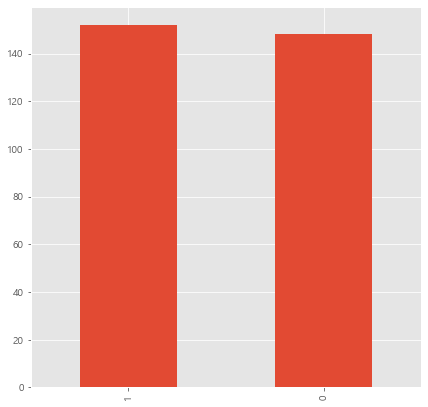

In [39]:
df2["result"].value_counts().plot(kind = "bar")

In [42]:
X_train = [] 
for sentence in tqdm(df2['title']): # df2 title로 진행
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:02<00:00, 111.13it/s]


In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [44]:
print(tokenizer.word_index)

{'을': 1, '뱃지': 2, '위': 3, '하': 4, '당신': 5, '웹툰': 6, '일러스트': 7, '즈': 8, '보다': 9, '로': 10, '나': 11, '담다': 12, '프로젝트': 13, '굿': 14, '내': 15, '스케치업': 16, '함께': 17, '북': 18, '속': 19, '세트': 20, '되다': 21, '백': 22, '없다': 23, '만들다': 24, '문': 25, '마음': 26, '달력': 27, '에서': 28, '카드': 29, '우리': 30, '제작': 31, '겨울': 32, '판': 33, '판타지': 34, '게임': 35, '공간': 36, '여행': 37, '사랑': 38, '키트': 39, '인형': 40, '가죽': 41, '시간': 42, '아트': 43, '고양이': 44, '기억': 45, '작다': 46, '인': 47, '선물': 48, '그림책': 49, '동물': 50, '배경': 51, '에세이': 52, '따뜻하다': 53, '파우치': 54, '노트': 55, '양': 56, '꿈': 57, '봄': 58, '디자인': 59, '소설': 60, '지': 61, '세상': 62, '든': 63, '전': 64, '플라스틱': 65, '지갑': 66, '첫': 67, '번째': 68, '서': 69, '여름': 70, '캐릭터': 71, '위해': 72, '성': 73, '스티커': 74, '특별하다': 75, '책': 76, '서울': 77, '중': 78, '귀엽다': 79, '제': 80, '종': 81, '알다': 82, '두': 83, '이야기': 84, '대': 85, '감정': 86, '환경': 87, '다이어리': 88, '별': 89, '신': 90, '형': 91, '찾다': 92, '브라': 93, '소재': 94, '에게': 95, '내일': 96, '꽃': 97, '포스터': 98, '있다': 99, '놀이': 100, '시': 101, '로만'

In [45]:
vocab_size = len(tokenizer.word_index)
print("단어 집합의 크기 :", vocab_size)

단어 집합의 크기 : 1301


In [50]:
y_train = np.array(df2['result'])

In [47]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

제목의 최대 길이 : 13
제목의 평균 길이 : 7.21


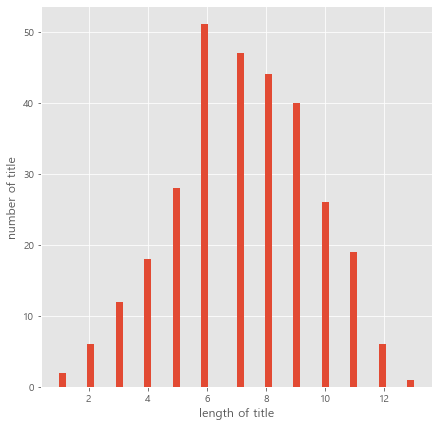

In [48]:
print('제목의 최대 길이 :',max(len(review) for review in X_train))
print('제목의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of title')
plt.ylabel('number of title')
plt.show()

In [49]:
max_len = 13
X_train = pad_sequences(X_train, maxlen=max_len)

In [51]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
3/4 [=====================>........] - ETA: 0s - loss: 0.6820 - acc: 0.5521
Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_model.h5
4/4 [==============================] - 3s 257ms/step - loss: 0.6672 - acc: 0.5833 - val_loss: 1.8579 - val_acc: 0.0000e+00
Epoch 2/15
3/4 [=====================>........] - ETA: 0s - loss: 0.7242 - acc: 0.5938
Epoch 00002: val_acc did not improve from 0.00000
4/4 [==============================] - 0s 45ms/step - loss: 0.6942 - acc: 0.6167 - val_loss: 1.0129 - val_acc: 0.0000e+00
Epoch 3/15
3/4 [=====================>........] - ETA: 0s - loss: 0.6263 - acc: 0.5990
Epoch 00003: val_acc did not improve from 0.00000
4/4 [==============================] - 0s 47ms/step - loss: 0.6159 - acc: 0.6167 - val_loss: 1.0362 - val_acc: 0.0000e+00
Epoch 4/15
3/4 [=====================>........] - ETA: 0s - loss: 0.5671 - acc: 0.6354
Epoch 00004: val_acc did not improve from 0.00000
4/4 [==============================] - 0s 51ms/step -

In [52]:
loaded_model = load_model('best_model.h5')

In [53]:
sentiment_predict("아름다운 우리나라")

66.39% 확률로 성공 제목입니다.



In [54]:
sentiment_predict("함께 만드는 웹진")

56.09% 확률로 실패 제목입니다.



In [55]:
sentiment_predict("다이어리")

51.35% 확률로 성공 제목입니다.



In [56]:
sentiment_predict("너를 만나는")

68.66% 확률로 성공 제목입니다.

